In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
#Loading the dataset
df=pd.read_csv("Data Group 4.csv")

In [4]:
#View data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#misssing values from each column
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#find the total number of missing values from the whole/entire dataset
df.isnull().sum().sum()

127

In [7]:
df.mean()

ApplicantIncome      5497.013645
CoapplicantIncome    1537.364366
LoanAmount            144.739394
Loan_Amount_Term      343.118236
Credit_History          0.846809
dtype: float64

In [8]:
#Handling missing values
#Filling using mode
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Using median
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Using forward fill
cols=['Dependents']
df.loc[:,cols]=df.loc[:,cols].ffill()
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Using arbitrary value
cols=['Credit_History']
df.loc[:,cols]=df.loc[:,cols].ffill()
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#Using median
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Deliting rows with missing values under gender
df=df.dropna(axis=0)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

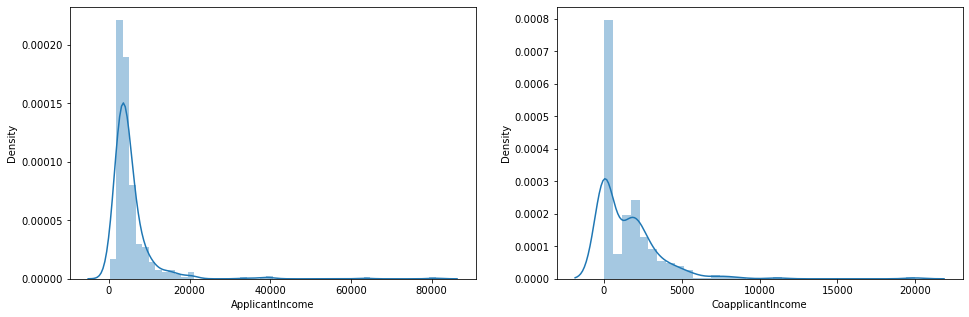

In [19]:
#Detecting outliers
#distribution plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome'])
plt.show()

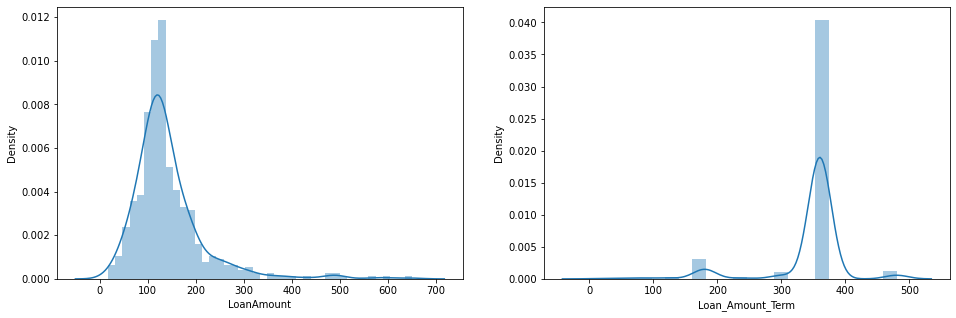

In [20]:
#Detecting outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])
plt.subplot(1,2,2)
sns.distplot(df['Loan_Amount_Term'])
plt.show()

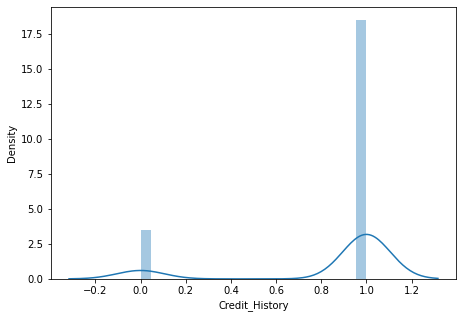

In [21]:
#Detecting outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Credit_History'])
plt.show()

In [22]:

print("Highest allowed",df['ApplicantIncome'].mean()+3*df['ApplicantIncome'].std())
print("Lowest allowed",df['ApplicantIncome'].mean()-3*df['ApplicantIncome'].std())

Highest allowed 23758.3763844654
Lowest allowed -13011.553322835181


In [23]:
#finding outliers
df[(df['ApplicantIncome']>24695.80)|(df['ApplicantIncome']<-13625.74)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [24]:
print("Highest allowed",df['Loan_Amount_Term'].mean()+3*df['Loan_Amount_Term'].std())
print("Lowest allowed",df['Loan_Amount_Term'].mean()-3*df['Loan_Amount_Term'].std())

Highest allowed 531.8185489419398
Lowest allowed 155.64069559086346


In [25]:
#finding outliers
df[(df['Loan_Amount_Term']>531.58)|(df['Loan_Amount_Term']<155.24)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
262,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,1.0,Rural,Y
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,1.0,Urban,Y


In [26]:
print("Highest allowed",df['CoapplicantIncome'].mean()+3*df['CoapplicantIncome'].std())
print("Lowest allowed",df['CoapplicantIncome'].mean()-3*df['CoapplicantIncome'].std())

Highest allowed 7988.198902584304
Lowest allowed -4919.316516943588


In [27]:
#finding outliers
df[(df['CoapplicantIncome']>8258.69)|(df['CoapplicantIncome']<-5165.01)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,1.0,Rural,Y


In [28]:
print("Highest allowed",df['LoanAmount'].mean()+3*df['LoanAmount'].std())
print("Lowest allowed",df['LoanAmount'].mean()-3*df['LoanAmount'].std())

Highest allowed 376.73091800865035
Lowest allowed -91.47048063290481


In [29]:
#finding outliers
df[(df['LoanAmount']>384.40)|(df['LoanAmount']<-96.22)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,0.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
432,LP002386,Male,No,0,Graduate,No,12876,0.0,405.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,1.0,Urban,Y


In [30]:
print("Highest allowed",df['Credit_History'].mean()+3*df['Credit_History'].std())
print("Lowest allowed",df['Credit_History'].mean()-3*df['Credit_History'].std())

Highest allowed 1.9392026783327816
Lowest allowed -0.2572941296250282


In [31]:
#finding outliers
df[(df['Credit_History']>1.92)|(df['Credit_History']<-0.21)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [32]:
#Handling outliers
#Trimming
new_df=df[(df['ApplicantIncome']<24695.80)&(df['ApplicantIncome']>-13625.74)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


In [33]:
#Capping Outliers
upper_limit=df['ApplicantIncome'].mean()+3*df['ApplicantIncome'].std()
lower_limit=df['ApplicantIncome'].mean()-3*df['ApplicantIncome'].std()

In [34]:
#Apply the capping
df['ApplicantIncome']=np.where(
df['ApplicantIncome']>upper_limit,upper_limit,np.where(df['ApplicantIncome']<lower_limit,lower_limit,df['ApplicantIncome'])
)

In [35]:
#Describe
df['ApplicantIncome'].describe()

count      503.000000
mean      5070.235106
std       3880.540106
min        150.000000
25%       2885.500000
50%       3850.000000
75%       5736.000000
max      23758.376384
Name: ApplicantIncome, dtype: float64

In [36]:
#Handling outliers
#Trimming
new_df=df[(df['CoapplicantIncome']<8258.69)&(df['CoapplicantIncome']>-5165.01)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479.0,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262.0,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598.0,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065.0,2004.0,250.0,360.0,1.0,Semiurban,Y


In [37]:
#Capping Outliers
upper_limit=df['CoapplicantIncome'].mean()+3*df['CoapplicantIncome'].std()
lower_limit=df['CoapplicantIncome'].mean()-3*df['CoapplicantIncome'].std()

In [38]:
#Apply the capping
df['CoapplicantIncome']=np.where(
df['CoapplicantIncome']>upper_limit,upper_limit,np.where(df['CoapplicantIncome']<lower_limit,lower_limit,df['CoapplicantIncome'])
)

In [39]:
#Describe
df['CoapplicantIncome'].describe()

count     503.000000
mean     1471.280939
std      1786.177506
min         0.000000
25%         0.000000
50%      1167.000000
75%      2292.500000
max      7988.198903
Name: CoapplicantIncome, dtype: float64

In [40]:
#Handling outliers
#Trimming
new_df=df[(df['LoanAmount']<384.40)&(df['LoanAmount']>-96.22)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479.0,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262.0,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598.0,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065.0,2004.0,250.0,360.0,1.0,Semiurban,Y


In [41]:
#Capping Outliers
upper_limit=df['LoanAmount'].mean()+3*df['LoanAmount'].std()
lower_limit=df['LoanAmount'].mean()-3*df['LoanAmount'].std()

In [42]:
#Apply the capping
df['LoanAmount']=np.where(
df['LoanAmount']>upper_limit,upper_limit,np.where(df['LoanAmount']<lower_limit,lower_limit,df['LoanAmount'])
)

In [43]:
#Describe
df['LoanAmount'].describe()

count    503.000000
mean     139.962306
std       66.130486
min       17.000000
25%      100.000000
50%      127.000000
75%      160.000000
max      376.730918
Name: LoanAmount, dtype: float64

In [44]:

#Handling outliers
#Trimming
new_df=df[(df['Loan_Amount_Term']<531.58)&(df['Loan_Amount_Term']>155.24)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479.0,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262.0,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598.0,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065.0,2004.0,250.0,360.0,1.0,Semiurban,Y


In [45]:
#Capping Outliers
upper_limit=df['Loan_Amount_Term'].mean()+3*df['Loan_Amount_Term'].std()
lower_limit=df['Loan_Amount_Term'].mean()-3*df['Loan_Amount_Term'].std()

In [46]:
#Apply the capping
df['Loan_Amount_Term']=np.where(
df['Loan_Amount_Term']>upper_limit,upper_limit,np.where(df['Loan_Amount_Term']<lower_limit,lower_limit,df['Loan_Amount_Term'])
)

In [47]:
#Describe
df['Loan_Amount_Term'].describe()

count    503.000000
mean     345.130748
std       57.154538
min      155.640696
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [48]:
#Descriptive Analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,5070.235106,1471.280939,139.962306,345.130748,0.840954
std,3880.540106,1786.177506,66.130486,57.154538,0.366083
min,150.000000,0.000000,17.000000,155.640696,0.000000
25%,2885.500000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,1167.000000,127.000000,360.000000,1.000000
75%,5736.000000,2292.500000,160.000000,360.000000,1.000000
max,23758.376384,7988.198903,376.730918,480.000000,1.000000


In [49]:
df.median()

ApplicantIncome      3850.0
CoapplicantIncome    1167.0
LoanAmount            127.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [50]:
df.skew()

ApplicantIncome      2.616581
CoapplicantIncome    1.454701
LoanAmount           1.569409
Loan_Amount_Term    -1.988246
Credit_History      -1.870153
dtype: float64

In [51]:
df.shape

(503, 13)

In [52]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [53]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [55]:
#dependents column
df['Dependents'].value_counts()

0     299
1      84
2      82
3+     38
Name: Dependents, dtype: int64

In [56]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

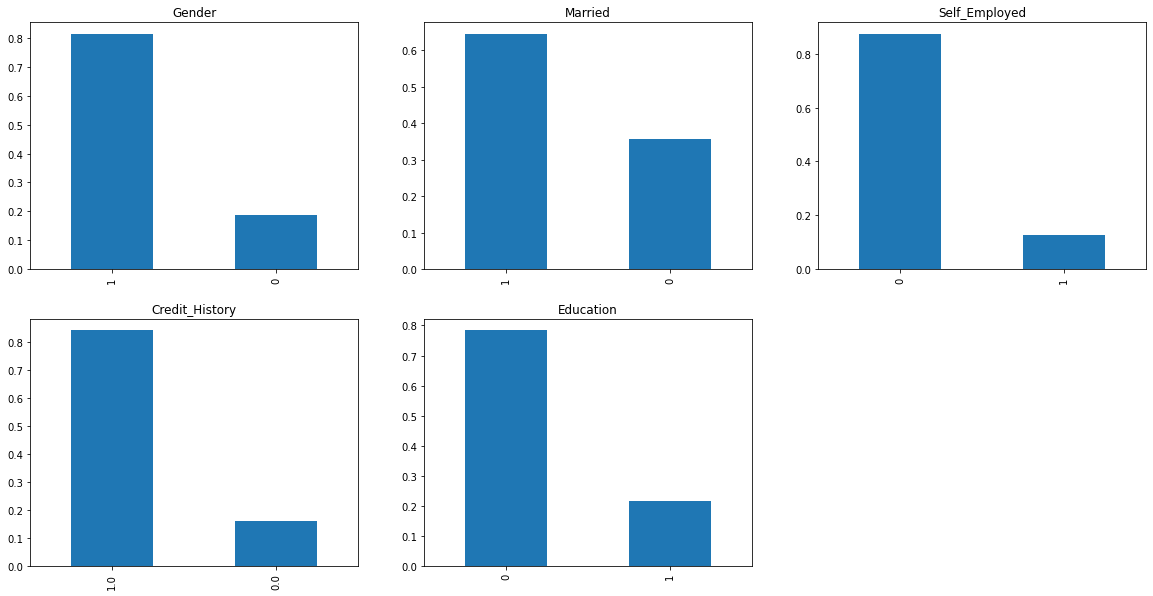

In [98]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

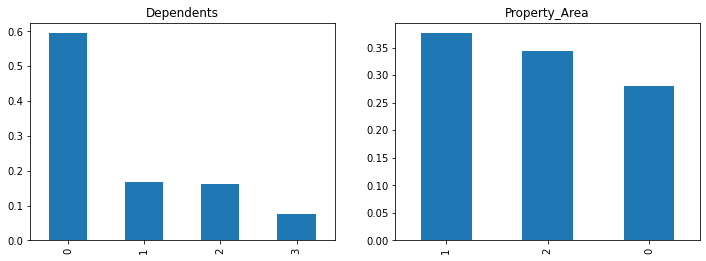

In [99]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

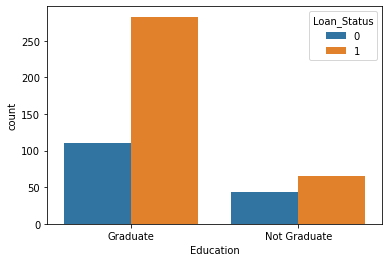

In [57]:
#education and loan status
sns.countplot(x='Education', hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

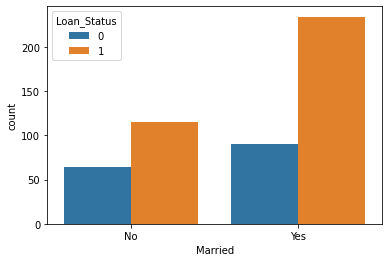

In [58]:
#marital status and loan status
sns.countplot(x='Married', hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

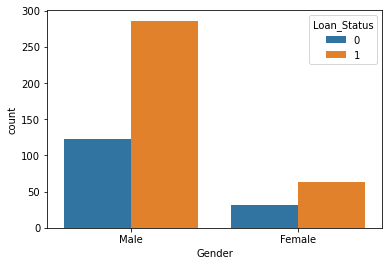

In [59]:
#marital status and loan status
sns.countplot(x='Gender', hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

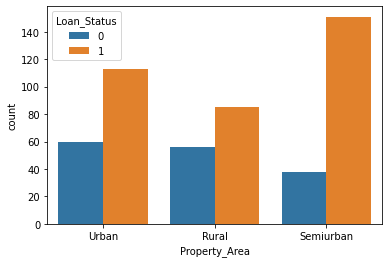

In [60]:
#marital status and loan status
sns.countplot(x='Property_Area', hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

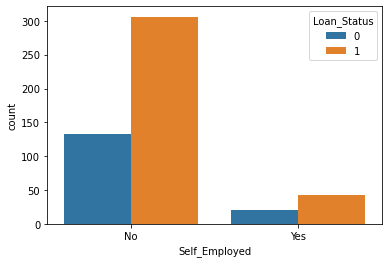

In [61]:
#marital status and loan status
sns.countplot(x='Self_Employed', hue='Loan_Status',data=df)

In [64]:
#FEATURE EXTRACTION
#converting cataegorical columns to numeric values
label_encoder=preprocessing.LabelEncoder()

In [76]:
df['Loan_ID']=label_encoder.fit_transform(df['Loan_ID'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Married']=label_encoder.fit_transform(df['Married'])
df['Dependents']=label_encoder.fit_transform(df['Dependents'])
df['Education']=label_encoder.fit_transform(df['Education'])
df['Self_Employed']=label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']=label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']=label_encoder.fit_transform(df['Loan_Status'])


print(df['Loan_ID'].unique())
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [77]:
df.dtypes

Loan_ID                int32
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [78]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,127.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [79]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [80]:
print(X)
print(Y)

[[  0.   1.   0. ... 360.   1.   2.]
 [  1.   1.   1. ... 360.   1.   0.]
 [  2.   1.   1. ... 360.   1.   2.]
 ...
 [500.   1.   0. ... 360.   1.   0.]
 [501.   1.   1. ... 360.   1.   1.]
 [502.   1.   1. ... 360.   1.   2.]]
[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 1

In [81]:
#Model tuning
#separating data into dependent and independent variables
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [82]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0           5849.0   
1         1        1           1          0              0           4583.0   
2         1        1           0          0              1           3000.0   
3         1        1           0          1              0           2583.0   
4         1        0           0          0              0           6000.0   
..      ...      ...         ...        ...            ...              ...   
508       1        1           0          0              1           2479.0   
509       0        0           1          0              0          13262.0   
510       1        0           0          1              0           3598.0   
511       1        1           1          0              0           6065.0   
512       1        1           2          0              0           3283.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [83]:
#Splitting data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [84]:
print(X.shape,X_train.shape,X_test.shape)

(503, 11) (452, 11) (51, 11)


<function matplotlib.pyplot.show(close=None, block=None)>

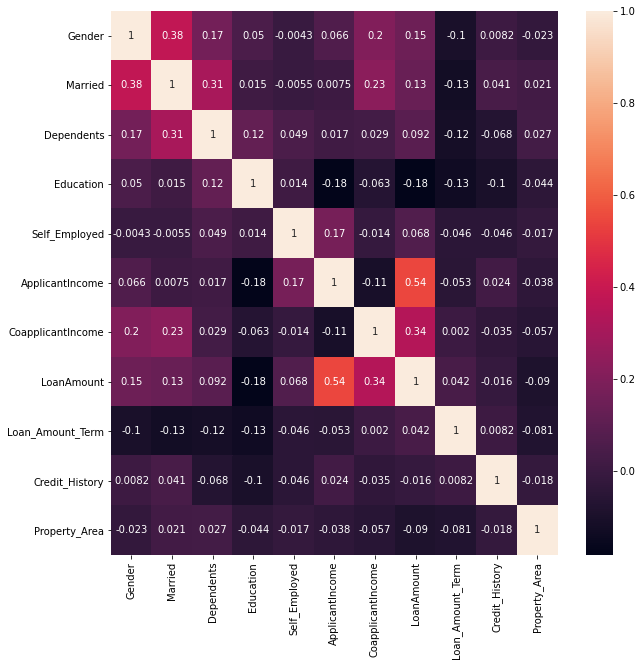

In [85]:
plt.figure(figsize=(10,10))
correlation_matrix=X_train.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

In [86]:
predictors_Logistic=['Credit_History','Education','Gender']
x_train = df[list(predictors_Logistic)].values
y_train = df["Loan_Status"].values
x_test=df[list(predictors_Logistic)].values

In [87]:
# fitting the model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [88]:
# make prediction
pred_cv = model.predict(X_train)

In [89]:
#Checking the accuracy score
accuracy_score(Y_train, pred_cv)

0.8030973451327433

In [90]:
#Predicting the results
pred_cv = model.predict(X_test)

In [91]:
accuracy_score(Y_test, pred_cv)

0.8431372549019608

In [92]:
y_pred = model.predict(X_test)

In [93]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)

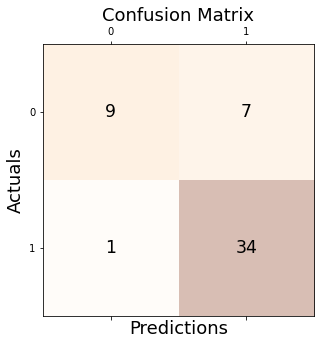

In [94]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [95]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.829


In [96]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.971


In [97]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.895
